# Evolutionary Computation - Assignment 7 Report

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib import MatplotlibDeprecationWarning
import warnings

In [2]:
dfTSPA = pd.read_csv('.\\TSPA.csv', sep=';', names=['X', 'Y', 'Cost'])
dfTSPB = pd.read_csv('.\\TSPB.csv', sep=';', names=['X', 'Y', 'Cost'])

min_cost_A = dfTSPA['Cost'].min()
max_cost_A = dfTSPA['Cost'].max()
dfTSPA['Normalized_Cost'] = (dfTSPA['Cost'] - min_cost_A) / (max_cost_A - min_cost_A)

min_cost_B = dfTSPB['Cost'].min()
max_cost_B = dfTSPB['Cost'].max()
dfTSPB['Normalized_Cost'] = (dfTSPB['Cost'] - min_cost_B) / (max_cost_B - min_cost_B)

## Problem description

### Problem

We were to find a cycle that consisted of exactly 50% of the available nodes, where each node had its own cost along with x and y coordinates. The objective function was a sum of node costs and distances (Euclidean) between each traveled node. 

### Solution implementation

We have added a new method - Large neighborhood search with two variants (using or not using local search after destroy-repair operators).

* **Large neighborhood search**

    * **Input:**
        - `nodes` : An array of available nodes
        - `costDistanceInfo` : A symmetric matrix of distances and costs between nodes
        - `maxRuntime` : Double representing the maximal runtime of the cycle generator method.
        - `destroyRatio` : Double representing the ratio of nodes to be destroyed in each cycle iteration.
        - `flagLSAfter` : Boolean informing whether to use the Local Search after destroy repair operations.

    * **Output:**
        - An array of new `cycle` node IDs

    * **Function:**

        ```python
        FUNCTION generateCycle(start_pos)
            INITIALIZE bestCycle TO Randomly Generated Cycle
            RUN LocalSearch ON bestCycle
            INITIALIZE timePassed TO 0

            WHILE timePassed < maxRuntime DO
                INITIALIZE currCycle TO a copy of bestCycle
                CALL destroy(currCycle)
                CALL repair(currCycle)
                
                IF flagLSAfter THEN
                    INITIALIZE lsGen AS LocalSearchGenerator(costDistanceInfo, currCycle)
                    SET currCycle TO lsGen.generateCycle(start_pos)
                END IF
                
                SET currCost TO calculateCycleCost(currCycle)
                IF currCost < bestCost THEN
                    SET bestCost TO currCost
                    SET bestCycle TO currCycle
                END IF
                
                SET currTime TO current system time
                SET timePassed TO time difference between currTime and startTime
            END WHILE
            RETURN bestCycle
        END FUNCTION

        FUNCTION destroy(cycle)
            INITIALIZE iterations TO (destroyNodeRatio * size of cycle)

            FOR it FROM 0 TO iterations - 1 DO
                INITIALIZE costsAndNodes TO an empty array
                SET prevNodeId TO last element in cycle
                INITIALIZE costSum TO 0

                FOR id FROM 0 TO size of cycle - 1 DO
                    SET nextNodeId TO node at index (id + 1) % size of cycle
                    CALCULATE currNodeCost AS (distance from prevNodeId to id) + (distance from id to nextNodeId) + node cost at id
                    ADD (currNodeCost, id) TO costsAndNodes
                    INCREMENT costSum BY currNodeCost
                    SET prevNodeId TO id
                END FOR
                
                SORT costsAndNodes by first element (costs)
                DIVIDE first element in costsAndNodes by costSum

                FOR i FROM 1 TO size of costsAndNodes - 1 DO
                    DIVIDE costsAndNodes[i].first BY costSum
                    ADD costsAndNodes[i-1].first TO costsAndNodes[i].first
                END FOR

                GENERATE random float currPick BETWEEN 0 and 1
                SET selectedNodeToRemove TO second element of costsAndNodes[0]
                FOR nodeCostPair IN costsAndNodes DO
                    IF nodeCostPair.first > currPick THEN
                        SET selectedNodeToRemove TO nodeCostPair.second
                        BREAK
                    END IF
                END FOR
                REMOVE selectedNodeToRemove FROM cycle
            END FOR
        END FUNCTION

        FUNCTION repair(cycle)
            INITIALIZE kRegretGenerator AS KRegretGreedyCycleCombinationGenerator(costDistanceInfo, nodes, 0.5)
            SET cycle TO kregretGenerator.generateCycle(0, cycle)
        END FUNCTION
        ```

## Presenting the results

### Results presented as minimum, average and maximum of objective function

Presented in a table below, each method and each problem instance is shown.

In [3]:
file_paths = ['..\\Lab6\\TSPA_IteratedLocalSearch.csv', '..\\Lab6\\TSPA_MultistartLocalSearch.csv',
              '.\\TSPA_LnsNoLS.csv', '.\\TSPA_LnsWithLS.csv',
              '..\\Lab6\\TSPB_IteratedLocalSearch.csv', '..\\Lab6\\TSPB_MultistartLocalSearch.csv',
              '.\\TSPB_LnsNoLS.csv', '.\\TSPB_LnsWithLS.csv'] 
methods = ['Iterated LS 20 runs', 'Multiple start LS 20 runs', "LNS No LS 20 runs", "LNS With LS 20 runs"]
results = []
best_solutions = []
counter = 0
for file_path, method in zip(file_paths, methods * 2):
    df = pd.read_csv(file_path)
    costs = df.iloc[:, -1]
    minimum = costs.min()
    maximum = costs.max()
    mean = round(costs.mean(), 2)
    if counter < len(methods):
        results.append((method, 'TSPA', f"{mean} ({minimum} - {maximum})"))
    else:
        results.append((method, 'TSPB', f"{mean} ({minimum} - {maximum})"))
    if '..' not in file_path:
        min_sol = df.loc[costs.idxmin()][:-1].to_list()
        best_solutions.append(min_sol)
    counter += 1
# Results from previous reports
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71509.42 (70571 - 72485)"))
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "50033.92 (45855 - 54814)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71470.14 (70510 - 72614)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "49895.7 (45867 - 54814)"))
result_df = pd.DataFrame(results, columns=['Method', 'Column', 'Value'])
result_df = result_df.pivot(index='Method', columns='Column', values='Value')
result_df.columns.name = None
result_df

,TSPA,TSPB
Method,,
Greedy LS (Edges) on 2-Regret Weighted 200 runs,71509.42 (70571 - 72485),50033.92 (45855 - 54814)
Iterated LS 20 runs,69256.11 (69095 - 69614),43634.53 (43448 - 44215)
LNS No LS 20 runs,70097.05 (69336 - 71100),44849.16 (43961 - 47055)
LNS With LS 20 runs,70020.58 (69373 - 71128),44481.84 (43845 - 45540)
Multiple start LS 20 runs,71250.74 (70684 - 71957),45795.84 (45108 - 46295)
Steepest LS (Edges) on 2-Regret Weighted 200 runs,71470.14 (70510 - 72614),49895.7 (45867 - 54814)


Information regarding running time and iterations of main loop of different methods.

In [4]:
times_files = ['..\\Lab6\\times.csv', '..\\Lab6\\ILSruns.csv']

results_times = []
for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None).iloc[:, :-1]
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if counter_main < 1:
            if count < 1:
                results_times.append(('Multiple start LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
            else:
                results_times.append(('Multiple start LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
        else:
            if count < 1:
                results_times.append(('Iterated LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
            else:
                results_times.append(('Iterated LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))

times_files = ['.\\TSPA_LnsNoLS_iters.csv', '.\\TSPA_LnsWithLS_iters.csv', '.\\TSPB_LnsNoLS_iters.csv', '.\\TSPB_LnsWithLS_iters.csv']

for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None)
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if file ==  '.\\TSPA_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '.\\TSPA_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '.\\TSPB_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '.\\TSPB_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))

times_df = pd.DataFrame(results_times, columns=['Method', 'Column', 'Value'])
times_df = times_df.pivot(index='Method', columns='Column', values='Value')
times_df.columns.name = None  
times_df

,TSPA,TSPB
Method,,
Iterated LS,2602.95 (2358 - 2823) runs,2611.65 (2416 - 2886) runs
LNS No LS,4271.3 (4105 - 4412) runs,3747.8 (2524 - 4215) runs
LNS With LS,3460.75 (2903 - 3698) runs,2837.95 (1847 - 3562) runs
Multiple start LS,36404.82 (33524.3 - 38601.8) ms,34441.575 (33030.7 - 38215.2) ms


### Visualization of the best path for each method

Additionally, a list of node indices is presented.

LNS No LS 20 runs
TSPA
[14, 49, 178, 106, 52, 55, 185, 40, 165, 90, 81, 196, 157, 31, 56, 113, 175, 171, 16, 78, 145, 179, 57, 92, 129, 25, 44, 120, 2, 152, 97, 1, 101, 75, 86, 26, 100, 121, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 65, 116, 43, 42, 184, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 18, 108, 69, 159, 193, 41, 115, 139, 46, 68, 140, 93, 117, 0, 143, 183, 89, 186, 23, 137, 176, 80, 79, 63, 94, 124, 148, 9, 62, 102, 144]
0 2
TSPB
[35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 99, 130, 95, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 177, 5, 78, 175, 162, 80, 190, 136, 73, 54, 31, 193, 117, 198, 156, 1, 16, 27, 38, 135, 63, 40, 107, 133, 122, 131, 121, 51, 90, 147, 6, 188, 169, 132, 13, 70, 3, 15, 145, 195, 168, 43, 139, 11, 138, 33, 160, 144, 104, 8, 82, 111, 29, 0, 109]


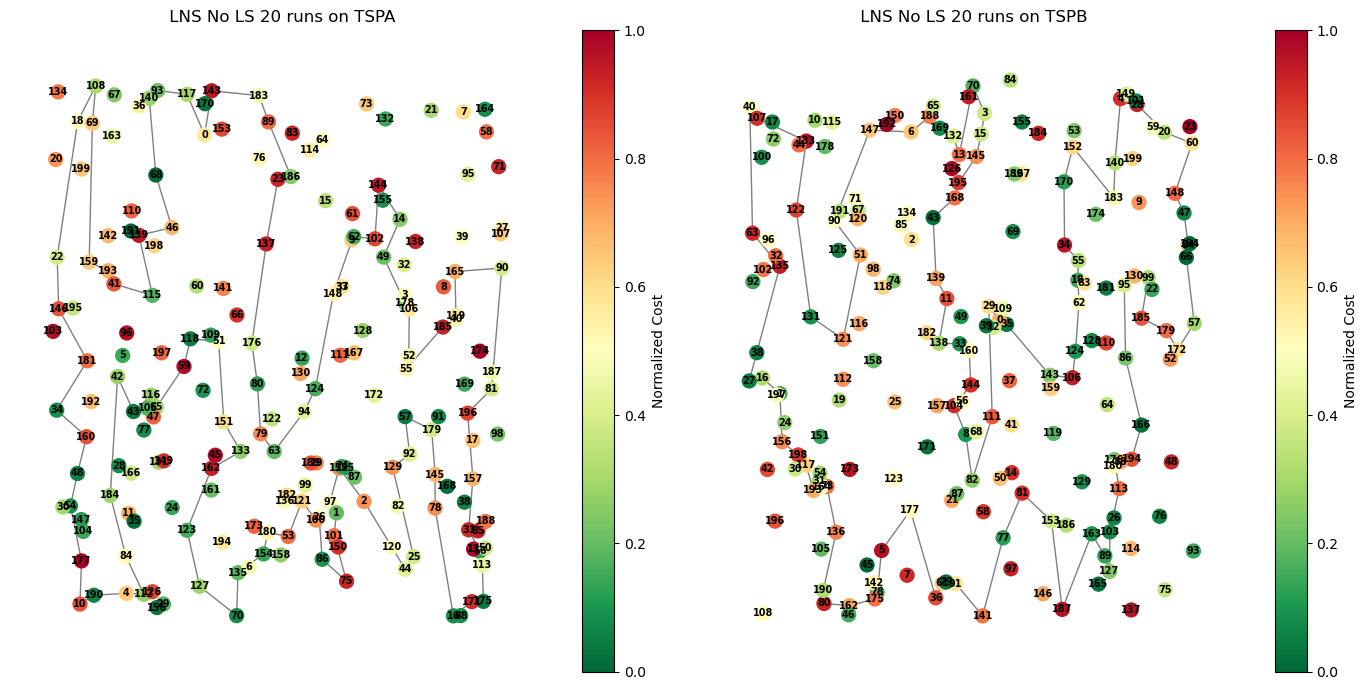

LNS With LS 20 runs
TSPA
[179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 120, 92, 57, 129, 2, 152, 97, 1, 101, 75, 86, 26, 100, 121, 53, 180, 154, 135, 70, 127, 123, 112, 4, 84, 35, 184, 190, 10, 177, 54, 48, 160, 34, 181, 42, 43, 116, 65, 59, 118, 115, 46, 68, 139, 41, 193, 159, 146, 22, 18, 69, 108, 140, 93, 117, 0, 143, 183, 89, 186, 23, 137, 176, 80, 51, 151, 162, 133, 79, 63, 94, 124, 148, 9, 62, 102, 144, 14, 49, 178, 106, 52, 55, 185, 40, 165, 90, 81, 196]
1 3
TSPB
[143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 172, 179, 185, 99, 130, 95, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 177, 5, 78, 175, 45, 162, 80, 190, 136, 73, 54, 31, 193, 117, 198, 156, 1, 16, 27, 38, 135, 63, 40, 107, 133, 122, 131, 121, 51, 90, 147, 6, 188, 169, 132, 70, 3, 15, 145, 13, 195, 168, 43, 139, 11, 138, 33, 160, 144, 104, 8, 82, 111, 29, 0, 109, 35]


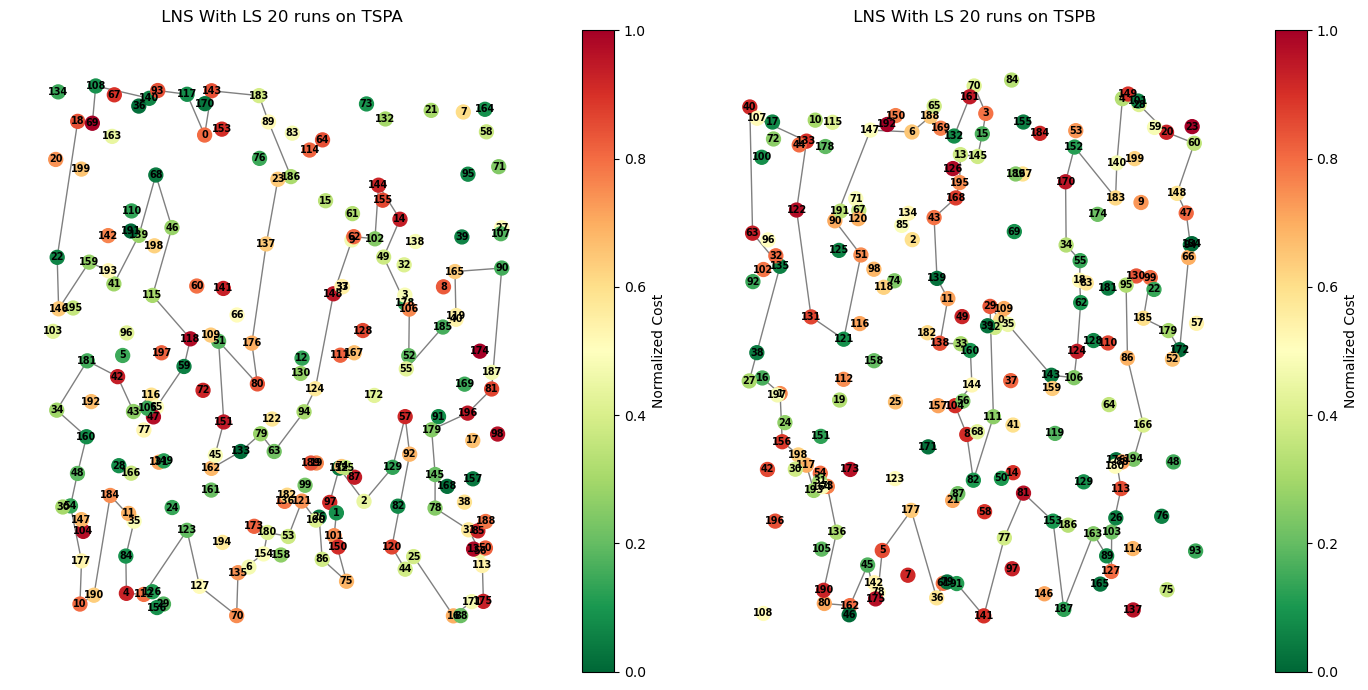

In [5]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
cmap = plt.cm.get_cmap('RdYlGn_r')

for count, method in enumerate(methods[2:]):
    if count == len(best_solutions) // 2:
        break
    print(method)
    print('TSPA')
    print(best_solutions[count])
    print(count, count + len(best_solutions)//2)
    print('TSPB')
    print(best_solutions[count + len(best_solutions)//2])

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    for count, sol in enumerate([best_solutions[count], best_solutions[count + len(best_solutions)//2]]):
        if count == 0:
            df_temp = dfTSPA
            ax = axs[0]
            instance = 'TSPA'
        else:
            df_temp = dfTSPB
            ax = axs[1]
            instance = 'TSPB'

        G = nx.Graph()
        positions = {}

        for idx in sol:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for idx in [i for i in range(0,200) if i not in sol]:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for i in range(len(sol) - 1):
            G.add_edge(sol[i], sol[i + 1])
        G.add_edge(sol[-1], sol[0])


        normalized_costs = df_temp['Normalized_Cost']
        norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
        node_colors = [cmap(norm(df_temp.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]

        nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=100,
            font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)

        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Normalized Cost')

        ax.set_title(f" {method} on {instance}")

    plt.tight_layout()
    plt.show()

## Additional Information

### Solution checker

We have checked all of the best solutions via the solution checker provided.

### Source code link

The source code is available in a repository [here](https://github.com/Mickeyo0o/EvolutionaryComp/tree/main/Lab7) under the Lab7 folder.

## Conclusions

LNS methods show a large improvement in terms of iterations that they are able to produce compared to the Iterated Local Search. On the other hand they are unable to produce better results, than ILS. They are able to produce results better than the Basic Steepest and Greedy Methods with 2-regret and MSLS. The newly created methods strike a balance between exploration and local optimization. 

Adding Local Search after each destroy-repair operation improves solution quality while requiring fewer iterations. LNS with Local Search refines the solution more effectively in each step, allowing it to achieve better results despite running fewer iterations compared to LNS without Local Search. This shows the value of combining Local Search with the destroy-repair process for better efficiency and outcomes.

## Authors

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956